In [1]:
from fastbook import *

In [2]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls), urls[0]

(1,
 'http://3.bp.blogspot.com/-mJ-Kw1mdLOo/UeLJx7vxsaI/AAAAAAAADkg/TfDHtuJnY7I/s1600/The-Cardinal-Bird.jpg')

In [3]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=True)

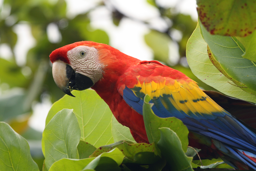

In [4]:
im = Image.open(dest)
im.to_thumb(256,256)

In [5]:
import os 
searches = 'forest', 'bird'
path = Path(r'bird_or_not')

if not path.exists():
    for search in searches:
        dest = (path/search)
        os.makedirs(dest.absolute(),exist_ok=True)
        results = search_images_ddg(f'{search} photo')
        download_images(dest, urls=results[:200])
        resize_image(dest, max_size=400, dest=dest)

In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

In [7]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=[Resize(192, method='squish'),]
).dataloaders(path)

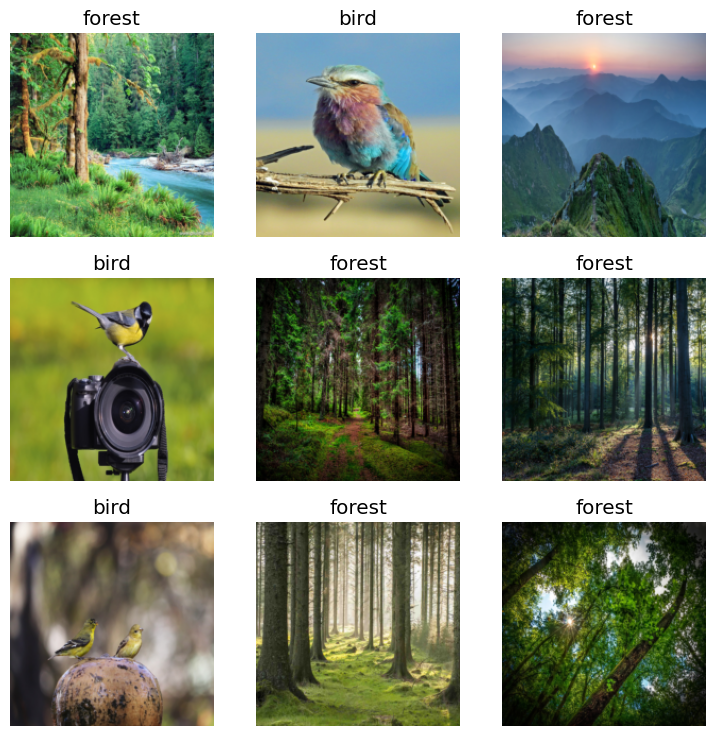

In [8]:
dls.show_batch(max_n=9)

In [9]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

c:\Python312\Lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,0.707412,0.517213,0.194444,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.052377,0.005409,0.000000,00:31


In [10]:
is_bird, _ , probs = learn.predict(PILImage.create('bird.jpg'))
print(f'This is a :{is_bird}.')
print(f"Probability it is a bird is : {probs[0]:.4f}")

This is a :bird.
Probability it is a bird is : 1.0000


## Book examples

In [12]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.159828,0.031907,0.013532,03:56


epoch,train_loss,valid_loss,error_rate,time
0,0.048195,0.015993,0.004736,05:42


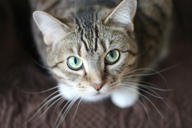

In [20]:
img = PILImage.create(r'C:\Users\Sunil\Learning\fast_ai\fast_ai_dlc\bird_or_not\image.png')
img.to_thumb(192)

In [21]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [22]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000
